# Decision Tree 사용해보기

## Stage1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
# train data 불러오기
df = pd.read_csv('data/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# test data 불러오기
df_tst = pd.read_csv('data/titanic_test.csv')
df_tst.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Stage2. Feature Engineering
- 빈칸 채우기
- 문자 데이터를 수치화
- 추가변수 생성
- 필요한 열만 추출

### 1. 빈칸 채우기

In [4]:
# train data의 빈칸
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# test data의 빈칸
df_tst.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### (1). Age 빈칸 채우기
- 평균나이로 채우기
- 1~5 범주로 묶기

In [6]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# 10살 기준으로 나이 나누기
df.loc[df['Age'] < 10, 'Age'] = 0
df.loc[(df['Age'] >= 10) & (df['Age'] < 20), 'Age'] = 1
df.loc[(df['Age'] >= 20) & (df['Age'] < 30), 'Age'] = 2
df.loc[(df['Age'] >= 30) & (df['Age'] < 40), 'Age'] = 3
df.loc[(df['Age'] >= 40) & (df['Age'] < 50), 'Age'] = 4
df.loc[df['Age'] >= 50, 'Age'] = 5
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,NaN,S


In [8]:
df_tst['Age'] = df_tst['Age'].fillna(df_tst['Age'].mean())
df_tst.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
df_tst.loc[df_tst['Age'] < 10, 'Age'] = 0
df_tst.loc[(df['Age'] >= 10) & (df_tst['Age'] < 20), 'Age'] = 1
df_tst.loc[(df_tst['Age'] >= 20) & (df_tst['Age'] < 30), 'Age'] = 2
df_tst.loc[(df_tst['Age'] >= 30) & (df_tst['Age'] < 40), 'Age'] = 3
df_tst.loc[(df_tst['Age'] >= 40) & (df_tst['Age'] < 50), 'Age'] = 4
df_tst.loc[df_tst['Age'] >= 50, 'Age'] = 5
df_tst.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,3.0,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,4.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,5.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,2.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,2.0,1,1,3101298,12.2875,NaN,S


#### (2). Fare 빈칸 채우기
- test data만

In [10]:
df_tst['Fare'] = df_tst['Fare'].fillna(df_tst['Fare'].mean())

#### (3). Cabin 빈칸 채우기
- 숫자데이터가 아니므로 빈도수가 높은 값으로 채울 것

In [11]:
# 앞 한 글자만 추출한 뒤 빈도수 세기
df['Cabin'] = df['Cabin'].str[0]
# C가 가장 많은 것을 확인할 수 있음
print(df['Cabin'].value_counts())

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64


In [12]:
df['Cabin'] = df['Cabin'].fillna('C')

In [13]:
df_tst['Cabin'] = df_tst['Cabin'].str[0]
df_tst['Cabin'] = df_tst['Cabin'].fillna('C')

#### (4). Embarked 빈칸 채우기
- train data만
- 숫자데이터가 아니므로 빈도수가 높은 값으로 채울 것

In [14]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
df['Embarked'] = df['Embarked'].fillna('S')

### 2. 문자 데이터를 수치화

#### (1). Sex 수치화

In [16]:
#방법1
# df.loc[df['Sex'] == 'male', 'Sex'] = 0
# df.loc[df['Sex'] == 'female', 'Sex'] = 1
# df.head()
#방법2 --> 추천
df['Sex'] = df["Sex"].map({
    'male':0,
    'female':1
})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,C,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,C,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",0,3.0,0,0,373450,8.0500,C,S


In [17]:
df_tst['Sex'] = df_tst['Sex'].map({
    'male':0,
    'female':1
})
df_tst.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,3.0,0,0,330911,7.8292,C,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,4.0,1,0,363272,7.0000,C,S
2,894,2,"Myles, Mr. Thomas Francis",0,5.0,0,0,240276,9.6875,C,Q
3,895,3,"Wirz, Mr. Albert",0,2.0,0,0,315154,8.6625,C,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,2.0,1,1,3101298,12.2875,C,S


#### (2). Cabin 수치화

In [18]:
df['Cabin'] = df['Cabin'].map({
    'C':0,
    'B':1,
    'D':2,
    'E':3,
    'A':4,
    'F':5,
    'G':6,
    'T':7
})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,0,C
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3.0,1,0,113803,53.1000,0,S
4,5,0,3,"Allen, Mr. William Henry",0,3.0,0,0,373450,8.0500,0,S


In [19]:
df_tst['Cabin'] = df_tst['Cabin'].map({
    'C':0,
    'B':1,
    'D':2,
    'E':3,
    'A':4,
    'F':5,
    'G':6,
    'T':7
})
df_tst.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,3.0,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,4.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",0,5.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",0,2.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,2.0,1,1,3101298,12.2875,0,S


#### (3). Embarked 수치화

In [20]:
df['Embarked'] = df['Embarked'].map({
    'S':0,
    'C':1,
    'Q':2
})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3.0,1,0,113803,53.1000,0,0
4,5,0,3,"Allen, Mr. William Henry",0,3.0,0,0,373450,8.0500,0,0


In [21]:
df_tst['Embarked'] = df_tst['Embarked'].map({
    'S':0,
    'C':1,
    'Q':2
})
df_tst.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,3.0,0,0,330911,7.8292,0,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,4.0,1,0,363272,7.0000,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,5.0,0,0,240276,9.6875,0,2
3,895,3,"Wirz, Mr. Albert",0,2.0,0,0,315154,8.6625,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,2.0,1,1,3101298,12.2875,0,0


### 3. 추가변수 생성
 
#### (1). SibSp와 Parch를 합쳐 FamilySize 만들기

In [22]:
print(df.shape)
print(df_tst.shape)

(891, 12)
(418, 11)


In [23]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df_tst['FamilySize'] = df_tst['SibSp'] + df_tst['Parch']

In [24]:
# 열이 하나 더 늘어났음을 확인 가능
# 891/418개의 데이터가 13/12가지 범주로 있음을 의미
print(df.shape)
print(df_tst.shape)

(891, 13)
(418, 12)


#### (2). IsAlone 열 추가하기
- 0이면 동반자 있음, 1이면 혼자온 것
- 기본적으로 혼자왔다고 세팅

In [25]:
df['IsAlone'] = 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,0,1,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3.0,1,0,113803,53.1000,0,0,1,1
4,5,0,3,"Allen, Mr. William Henry",0,3.0,0,0,373450,8.0500,0,0,0,1


In [26]:
# FamilySize>=1이라면, 즉 혼자 온 게 아니라면 IsAlone은 0
df.loc[df['FamilySize'] >= 1, 'IsAlone'] = 0
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,0,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3.0,1,0,113803,53.1000,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",0,3.0,0,0,373450,8.0500,0,0,0,1


In [27]:
df_tst['IsAlone'] = 1
df_tst.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",0,3.0,0,0,330911,7.8292,0,2,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,4.0,1,0,363272,7.0000,0,0,1,1
2,894,2,"Myles, Mr. Thomas Francis",0,5.0,0,0,240276,9.6875,0,2,0,1
3,895,3,"Wirz, Mr. Albert",0,2.0,0,0,315154,8.6625,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,2.0,1,1,3101298,12.2875,0,0,2,1


In [28]:
df_tst.loc[df_tst['FamilySize'] >= 1, 'IsAlone'] = 0
df_tst.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",0,3.0,0,0,330911,7.8292,0,2,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,4.0,1,0,363272,7.0000,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",0,5.0,0,0,240276,9.6875,0,2,0,1
3,895,3,"Wirz, Mr. Albert",0,2.0,0,0,315154,8.6625,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,2.0,1,1,3101298,12.2875,0,0,2,0


### 4. 필요한 열만 추출

In [29]:
train = df.drop(['Name','Ticket','SibSp','Parch','PassengerId'], axis=1)
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize,IsAlone
0,0,3,0,2.0,7.2500,0,0,1,0
1,1,1,1,3.0,71.2833,0,1,1,0
2,1,3,1,2.0,7.9250,0,0,0,1
3,1,1,1,3.0,53.1000,0,0,1,0
4,0,3,0,3.0,8.0500,0,0,0,1


In [30]:
test = df_tst.drop(['Name','Ticket','SibSp','Parch','PassengerId'], axis=1)
test.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize,IsAlone
0,3,0,3.0,7.8292,0,2,0,1
1,3,1,4.0,7.0000,0,0,1,0
2,2,0,5.0,9.6875,0,2,0,1
3,3,0,2.0,8.6625,0,0,0,1
4,3,1,2.0,12.2875,0,0,2,0


## Stage3. Scikit-learn으로 Decision Tree 구현하기
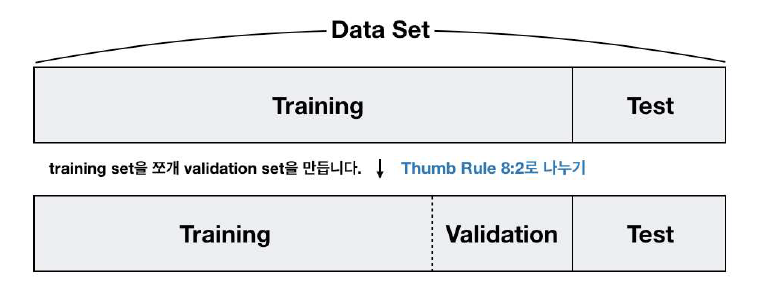

- training set : 모델 학습에 사용되는 데이터
- validation set : 모델 제작 과정 중, 학습된 모델의 성능을 측정하기 위한 데이터
- test set : 모델의 최종 성능을 평가하기 위한 데이터

### training set과 validation set 나누기

In [31]:
from sklearn.model_selection import train_test_split

# train data에는 Survived 없애주기
train_data = train.drop('Survived', axis=1)
# target으로 삼는 데이터는 Survived
target_data = train['Survived']

#자동으로 75%, 25%로 나눠줌
x_train, x_valid, y_train, y_valid = train_test_split(train_data, target_data)

print(train_data.shape, x_train.shape, x_valid.shape)
print(train_data.shape, y_train.shape, y_valid.shape)

(891, 8) (668, 8) (223, 8)
(891, 8) (668,) (223,)


### DecisionTreeClassifier를 사용하여 학습하기

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Decision tree로 모델 꾸려줘
tree=DecisionTreeClassifier() 

# 학습해줘
tree.fit(x_train, y_train) 

# 학습된 모델로 x_train 결과를 얻고 그 예측을 y_train과 비교해서 정확도를 보여줘
print('train set accuracy:', tree.score(x_train, y_train))

# valid set도 보여줘
print('valid set accuracy:', tree.score(x_valid, y_valid)) 

train set accuracy: 0.9610778443113772
valid set accuracy: 0.7713004484304933


### 만들어진 DecisionTree로 test data를 예측하고 그 결과를 csv파일로 저장하기

In [33]:
tree.predict(test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [34]:
# 파일 생성
submit = pd.DataFrame({
    'PassengerId': df_tst['PassengerId'],
    'Survived': tree.predict(test)
})

In [35]:
# 파일 인덱스 제거
submit.to_csv('data/titanic_submit_tree.csv', index=False) 

In [36]:
# pandas로 submit.csv 불러와 확인하기
my_pre = pd.read_csv('data/titanic_submit_tree.csv')
my_pre

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## Stage4. 다양한 시각화 도전하기

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [38]:
df = pd.read_csv('data/titanic_train.csv')
df_tst = pd.read_csv('data/titanic_test.csv')

### Count Plot으로 Age에 따른 생존여부 히스토그램 얻기 
- 가운데 나이대가 특히 많이 사망했음

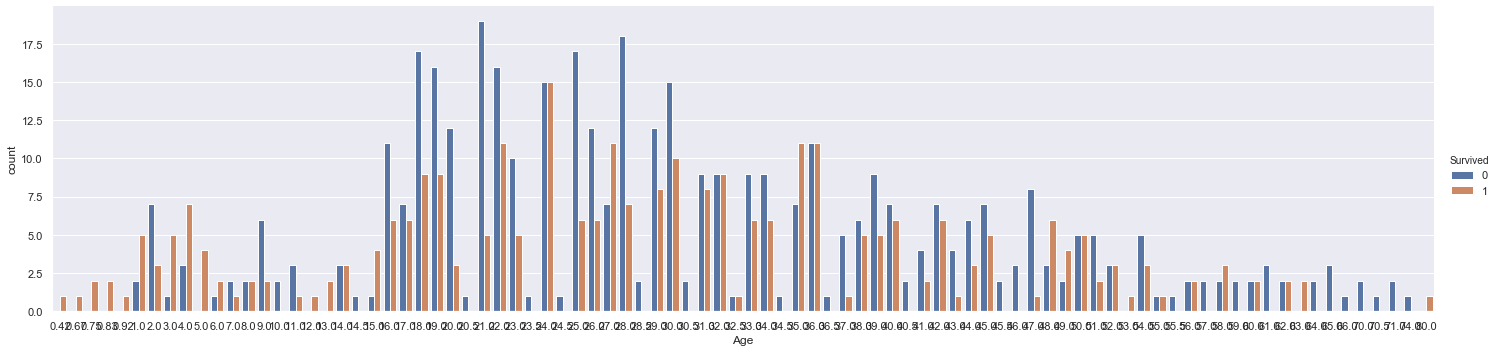

In [39]:
sns.catplot(data=df, x='Age', hue='Survived',kind='count', aspect=4)

### kdeplot 사용하여 매끄러운 곡선 분포도 얻기
- 10대 이하의 어린이들이 많이 살고, 20대 초반이 많이 사망했음

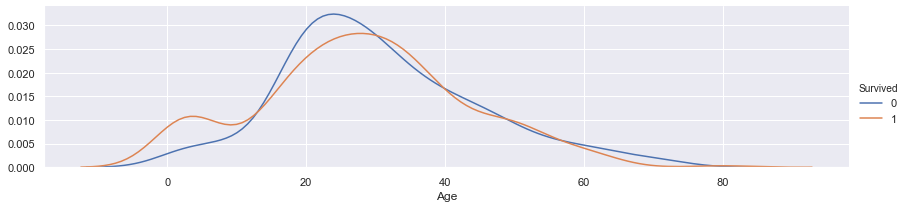

In [40]:
facet = sns.FacetGrid(df, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Age')
facet.add_legend()
plt.show()

### 빈칸을 더 현명하게 처리하기
- name에서 유용한 정보 남기기 -> mr, mrs, miss로 나이 추측 가능?
- 기존 방법 : 전체 나이의 평균을 넣기
- 새로운 방법 : mr, mrs, miss 기준으로 평균값 넣기

In [41]:
df[['Name','Age']].head()

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0


In [42]:
df.loc[df['Name'].str.contains('Mr\.'), 'Name'] = 'Mr'
df.loc[df['Name'].str.contains('Mrs\.'), 'Name'] = 'Mrs'
df.loc[df['Name'].str.contains('Miss\.'), 'Name'] = 'Miss'
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
df['Name'] = df['Name'].map({
    'Mr':0,
    'Mrs':1,
    'Miss':2
})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0.0,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1.0,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,2.0,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1.0,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0.0,male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
# 빈칸을 3으로 채우기
df['Name'] = df['Name'].fillna(3)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0.0,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1.0,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,2.0,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1.0,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0.0,male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
df['Name'].value_counts()

0.0    517
2.0    182
1.0    125
3.0     67
Name: Name, dtype: int64

In [46]:
# 이름(0,1,2,3)별로 평균을 구해서 빈칸 채우기
df['Age'] = df['Age'].fillna(df.groupby('Name')['Age'].transform('mean'))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0.0,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1.0,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,2.0,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1.0,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0.0,male,35.0,0,0,373450,8.0500,NaN,S


### 새로 채워진 Age에 따른 분포도 확인

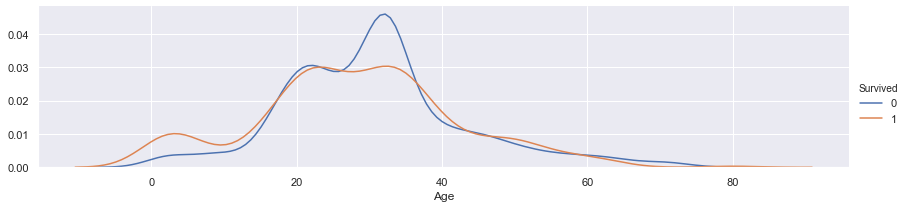

In [47]:
facet = sns.FacetGrid(df, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Age')
facet.add_legend()
plt.show()

### 승선 항구에 따른 Age분포를 box plot으로 살펴보기

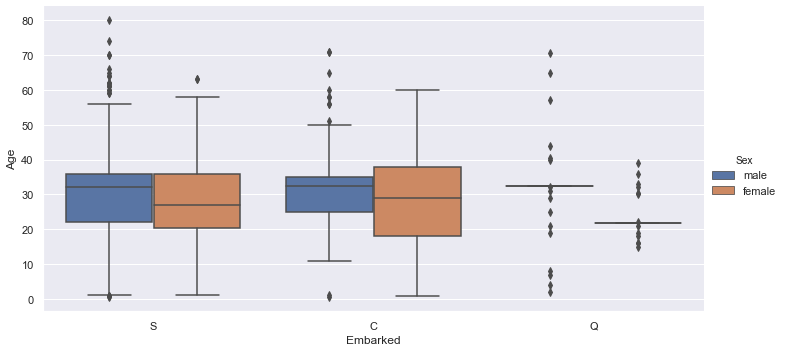

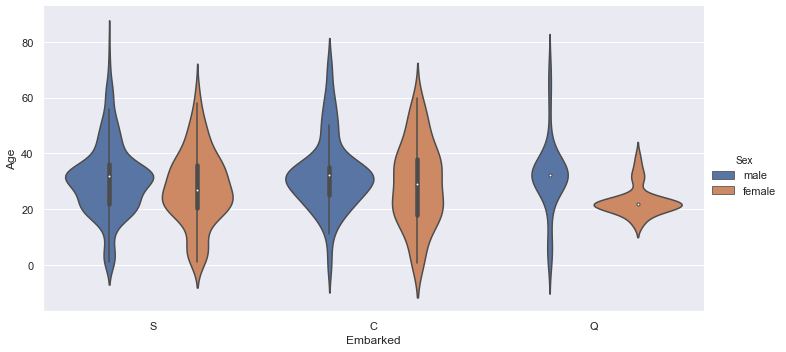

In [48]:
sns.catplot(data = df, x='Embarked',y='Age', aspect=2, kind='box', hue='Sex')
sns.catplot(data = df, x='Embarked',y='Age', aspect=2, kind='violin', hue='Sex')

cf. featured train data 저장

In [49]:
train.to_csv('data/titanic_train_featured.csv') 
pd.read_csv('data/titanic_train_featured.csv')

,Unnamed: 0,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize,IsAlone
0,0,0,3,0,2.0,7.2500,0,0,1,0
1,1,1,1,1,3.0,71.2833,0,1,1,0
2,2,1,3,1,2.0,7.9250,0,0,0,1
3,3,1,1,1,3.0,53.1000,0,0,1,0
4,4,0,3,0,3.0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,0,2.0,13.0000,0,0,0,1
887,887,1,1,1,1.0,30.0000,1,0,0,1
888,888,0,3,1,2.0,23.4500,0,0,3,0
889,889,1,1,0,2.0,30.0000,0,1,0,1


cf. featured test data 저장

In [50]:
test.to_csv('data/titanic_test_featured.csv') 
pd.read_csv('data/titanic_test_featured.csv')

,Unnamed: 0,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize,IsAlone
0,0,3,0,3.0,7.8292,0,2,0,1
1,1,3,1,4.0,7.0000,0,0,1,0
2,2,2,0,5.0,9.6875,0,2,0,1
3,3,3,0,2.0,8.6625,0,0,0,1
4,4,3,1,2.0,12.2875,0,0,2,0
...,...,...,...,...,...,...,...,...,...
413,413,3,0,3.0,8.0500,0,0,0,1
414,414,1,1,3.0,108.9000,0,1,0,1
415,415,3,0,3.0,7.2500,0,0,0,1
416,416,3,0,3.0,8.0500,0,0,0,1
